In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Rengarajan\DataScience\ML_Algorithms\Linear_Regression\height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
#Independent and dependent features
X=df[['Weight']]  # independent features should be a dataframe or 2 dimesnionalarray
y=df['Height']    # this variiable can be in series or 1d array

In [4]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

model=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
           'l1_ratio' :[0.5,1,1.5,2]}
elastic_net_regressor=GridSearchCV(model,parameters,scoring='neg_mean_squared_error',cv=5)

elastic_net_regressor.fit(X_train,y_train)

C:\Users\Rengarajan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.913e+02, tolerance: 4.321e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rengarajan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.031e+02, tolerance: 2.904e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rengarajan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.08

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100],
                         'l1_ratio': [0.5, 1, 1.5, 2]},
             scoring='neg_mean_squared_error')

In [28]:
print(elastic_net_regressor.best_params_)
print(elastic_net_regressor.best_score_)

{'alpha': 1e-15, 'l1_ratio': 0.5}
-50.22803898240423


In [29]:
#Prediction for test data
y_pred=elastic_net_regressor.predict(X_test)
y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7769869860423446


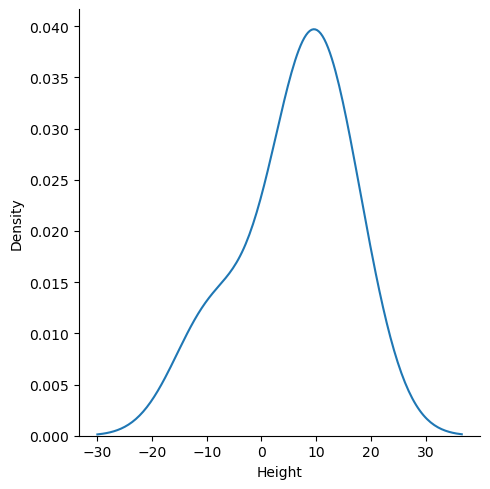

In [31]:
sns.displot(y_test-y_pred, kind='kde')